# Store The Images in The List

In [55]:
# import opencv
import cv2

# store list
image = []
lables = []

## Normal Person ECG with PreProcessing of the Image ##
for i in range(1, 285):
    img = cv2.imread(rf"D:\CODE\Heart desease cnn model\Heart-Disease-Classifier\Dataset\Normal Person ECG Images (284x12=3408)\Normal({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    image.append(gray)
    lables.append(0)  # Normal

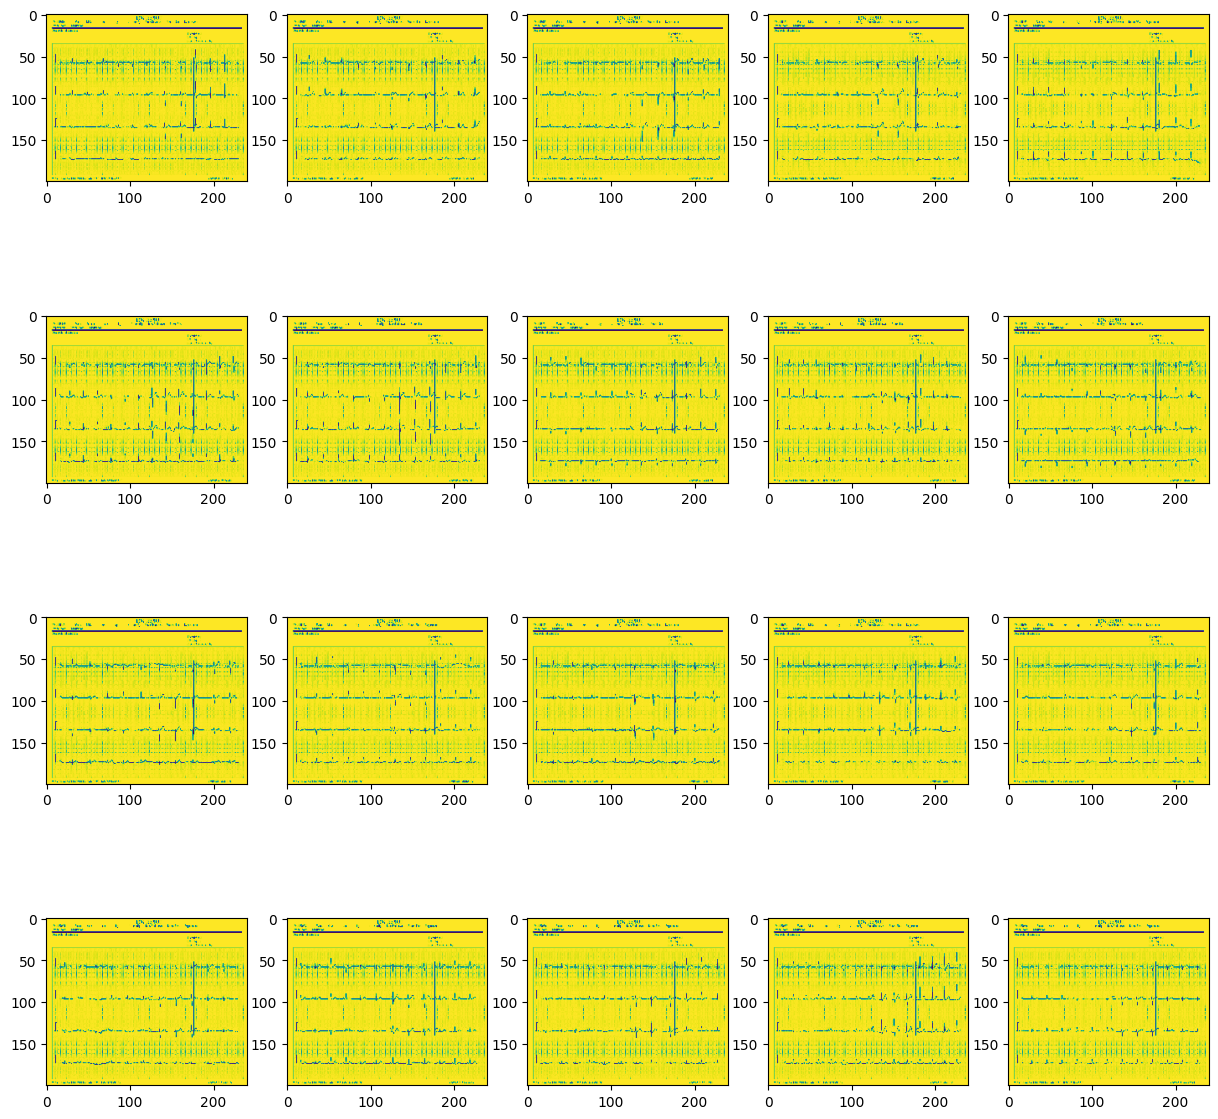

In [56]:
# Sample Images

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[10 + i*3])
plt.show()

In [57]:
## MI Infected Person ECG with PreProcessing of the Image ##

for i in range(1, 173):
    img = cv2.imread(fr"D:\CODE\Heart desease cnn model\Heart-Disease-Classifier\Dataset\Normal Person ECG Images (284x12=3408)\Normal({i}).jpg")
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    image.append(gray)
    lables.append(1)    # MI

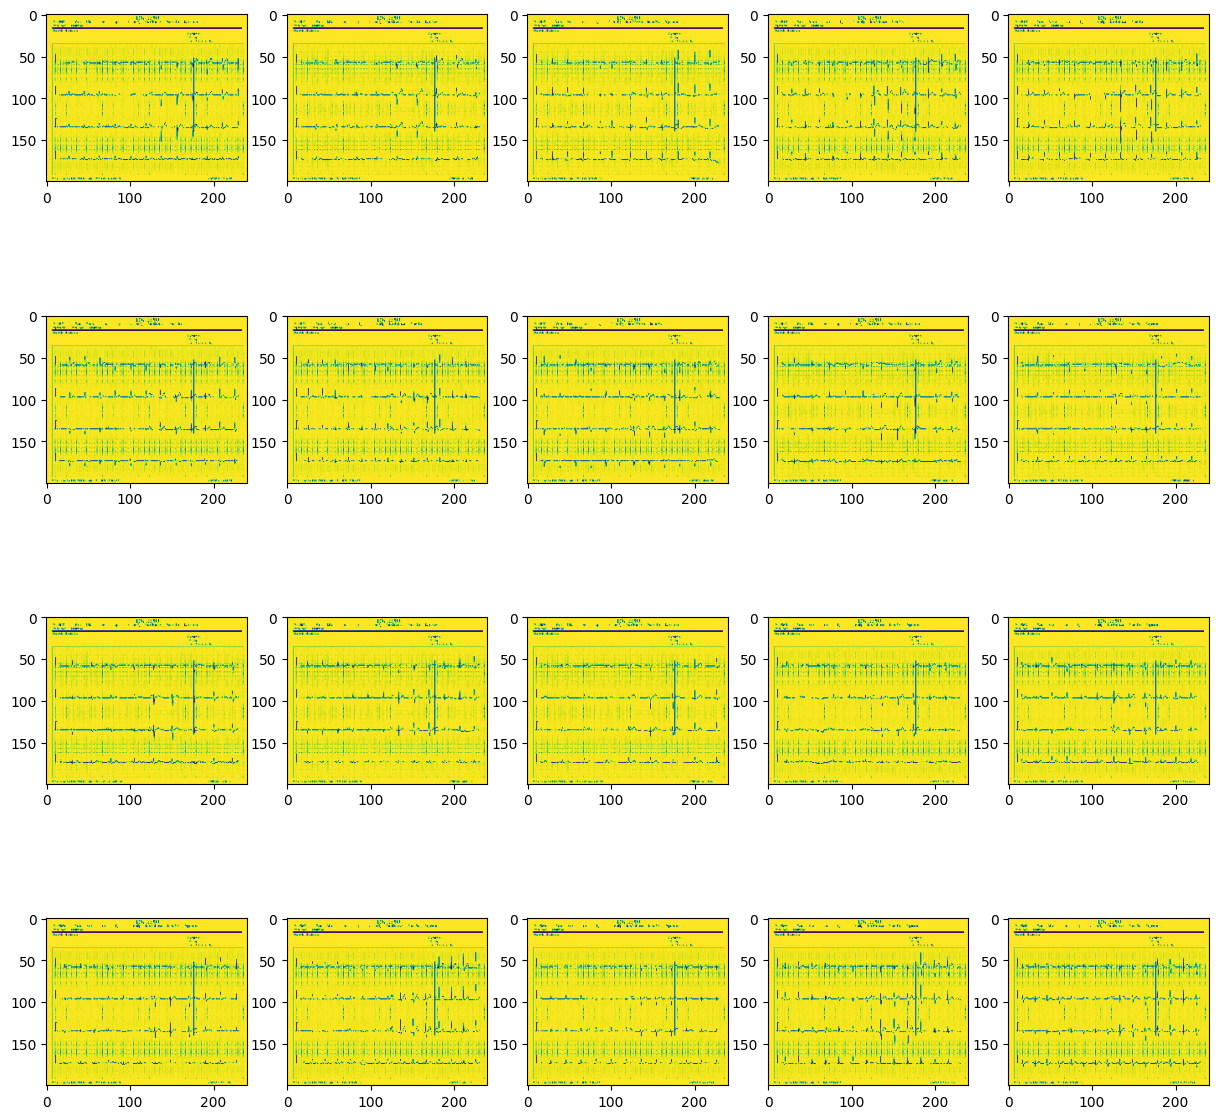

In [58]:
# Sample Images

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[300 + i*3])
plt.show()

In [59]:
# Shape of the Images

print(f"Shape of each image is = {image[1].shape}")

Shape of each image is = (200, 240)


In [60]:
# Convert The List into Array Format  #

import numpy as np

train_feature = np.array(image)
lables = np.array(lables)

In [61]:
## Display Array Shape ##

print(f"image dataset shape = {train_feature.shape}")

print(f"lable dataset shape = {lables.shape}")

image dataset shape = (456, 200, 240)
lable dataset shape = (456,)


## Split The Dataset into Test and Train 

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_feature,lables,test_size=0.1)

print(f"x_train shape = {x_train.shape}")

print(f"x_test shape = {x_test.shape}")

print(f"y_train shape = {y_train.shape}")

print(f"y_test shape = {y_test.shape}")

x_train shape = (410, 200, 240)
x_test shape = (46, 200, 240)
y_train shape = (410,)
y_test shape = (46,)


## Deep Learning CNN Model

In [63]:
# MODEL ARCHITECTURE

import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# ONE HOT ENCODING

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# MODEL LAYERS

model=Sequential()
# Convolutional Layers
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (200, 240, 1)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(300,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 200, 240, 50)   │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 200, 240, 75)   │        33,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 100, 120, 75)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 900000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │   450,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,245,727 (1.68 GB)

 Trainable params: 450,245,727 (1.68 GB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# MODEL COMPILE

from tensorflow.keras.optimizers import Adam

model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
# MODEL FITTING

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.5404 - loss: 36.1691 - val_accuracy: 0.3043 - val_loss: 0.7273
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.4291 - loss: 0.7048 - val_accuracy: 0.6957 - val_loss: 0.6875
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.6361 - loss: 0.6880 - val_accuracy: 0.6957 - val_loss: 0.6744
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - accuracy: 0.6311 - loss: 0.6791 - val_accuracy: 0.6957 - val_loss: 0.6550
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.6166 - loss: 0.6715 - val_accuracy: 0.6957 - val_loss: 0.6348


In [66]:
# Test our Model

predictions = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


In [67]:
# Accuracy of Our Model #

wrong = 0

for i in range(len(x_test)) :
    test = np.argmax(predictions[i])
    train = np.argmax(y_test[i])
    if (test != train):
        wrong += 1

print(f"Model Accuracy : {((len(x_test) - wrong) / len(x_test)) * 100} %")

Model Accuracy : 69.56521739130434 %
